In [1]:
# Setup
import pandas as pd
import numpy as np
import math


# Visualizations
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest
import seaborn as sns

In [2]:
df_vis = pd.read_csv("data/CSE_CAPES.csv")
df_vis.head(5)

,Unnamed: 0,LOCATION,ROOM,QUARTER_INDEX,QUARTER,COURSE_ID,COURSE_NUM,SECTION,INSTRUCTOR_LAST,INSTRUCTOR_FIRST,...,RATING,know_rating,prep_rating,audible_rating,expl_rating,attent_rating,note_rating,stimu_rating,rec_course_rating,rec_professor_rating
0,7815,NaN,NaN,9,FA12,CSE,11,755925,Ord,Richard,...,4.814815,4.301471,4.207407,4.169118,4.007353,3.305970,3.185185,4.096296,0.970588,0.904412
1,8523,PCYNH,109,9,FA12,CSE,30,755935,Ord,Richard,...,4.855670,4.686957,4.706897,4.784483,4.637931,4.336207,3.695652,4.330435,0.939655,0.991379
2,8640,PCYNH,109,9,FA12,CSE,8A,755909,Gillespie,Gary N,...,4.301471,4.814815,4.785047,4.822430,4.588785,3.953271,4.443396,4.398148,0.963964,0.936937
3,8661,PCYNH,109,9,FA12,CSE,8A,755913,Alvarado,Christine J.,...,4.686957,4.855670,4.824742,4.845361,4.721649,4.391753,4.762887,4.656250,0.938144,0.979381
4,8682,PCYNH,109,9,FA12,CSE,8A,762476,Lee,Cynthia Bailey,...,4.413793,4.413793,4.465517,4.508621,4.301724,3.829060,3.234783,4.258621,0.974576,0.940678


In [3]:
#Setting the dataframe, and cleaning it up
df_vis = df_vis.dropna()
df_vis = df_vis.drop(columns='Unnamed: 0')
df_vis.RATING = df_vis[['know_rating','prep_rating','audible_rating',
                          'expl_rating','attent_rating','note_rating',
                          'stimu_rating']].mean(axis=1)

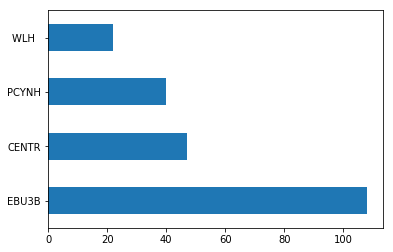

In [4]:
counts = df_vis['LOCATION'].value_counts()
df_vis = df_vis[df_vis['LOCATION'].isin(counts[counts>=10].index)]
counts = df_vis['LOCATION'].value_counts()
counts.plot(kind='barh')

f1 = plt.gcf()

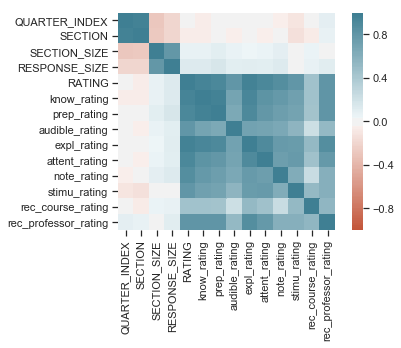

In [5]:
## YOUR CODE HERE
sns.set(style="ticks")
corr = df_vis.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)

To continue our exploration of the ratings, we want to see if there is a link between location and ratings.  We setup a for loop to calculate the all the average ratings for each location, and save the entries in their respective variables.

In [6]:
classes = df_vis.LOCATION.unique()
average_ratings = np.zeros(len(classes))
note_ratings = np.zeros(len(classes))
prep_ratings = np.zeros(len(classes))
audible_ratings = np.zeros(len(classes))
expl_ratings = np.zeros(len(classes))
rec_professor_ratings = np.zeros(len(classes))
rec_course_ratings = np.zeros(len(classes))
stimu_ratings = np.zeros(len(classes))
note_ratings = np.zeros(len(classes))
for i in range(len(classes)):
    average_ratings[i] = df_vis[df_vis.LOCATION == classes[i]].RATING.mean()
    note_ratings[i] = df_vis[df_vis.LOCATION == classes[i]].note_rating.mean()
    prep_ratings[i] = df_vis[df_vis.LOCATION == classes[i]].prep_rating.mean()
    audible_ratings[i] = df_vis[df_vis.LOCATION == classes[i]].audible_rating.mean()
    expl_ratings[i] = df_vis[df_vis.LOCATION == classes[i]].expl_rating.mean()
    rec_professor_ratings[i] = df_vis[df_vis.LOCATION == classes[i]].rec_professor_rating.mean()
    rec_course_ratings[i] = df_vis[df_vis.LOCATION == classes[i]].rec_course_rating.mean()
    stimu_ratings[i] = df_vis[df_vis.LOCATION == classes[i]].stimu_rating.mean()
    if np.isnan(average_ratings[i]) :
        average_ratings = average_ratings[:i]
        note_ratings = note_ratings[:i]
        prep_ratings = prep_ratings[:i]
        audible_ratings = audible_ratings[:i]
        expl_ratings = expl_ratings[:i]
        rec_professor_ratings = rec_professor_ratings[:i]
        rec_course_ratings = rec_course_rating[:i]
        stimu_ratings = stimu_rating[:i]
        classes[i]

In [7]:
COLOR_MAP = {0 : '#461969ff',
            1 : '#45337dff',
            2 : '#3c4f8aff',
            3 : '#33638dff',
            4 : '#29788eff',
            5 : '#25a186ff',
            6 : '#35b479ff',
            7 : '#5cc863ff',
            8 : '#c3df2eff',
            9 : '#fde725ff',
            10 : '#45B39D',
            11 : '#9B59B6',
            12 : '#A9DFBF',
            13 : '#D4AC0D'
           }

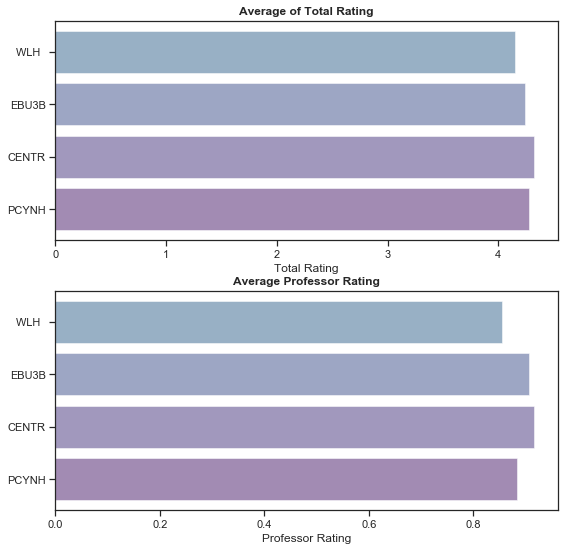

In [8]:
color1 = [COLOR_MAP[l] for l in range(len(classes))]

fig, ax = plt.subplots(nrows=2,ncols=1,figsize=(9,9))
fig.subplots_adjust(hspace = 0.23, wspace=0.70)
# Average Total Rating of each Location
ax[0].barh(classes, average_ratings, alpha=0.5, color=color1)
ax[0].set_xlabel('Total Rating')
ax[0].set_title('Average of Total Rating',fontweight='bold')
# Average Professor Rating of each Location
ax[1].barh(classes, rec_professor_ratings, alpha=0.5, color=color1)
ax[1].set_xlabel('Professor Rating')
ax[1].set_title('Average Professor Rating',fontweight='bold')

plt.show()

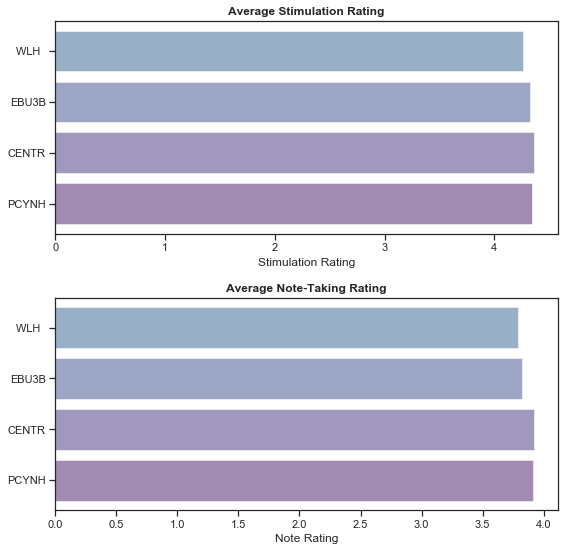

In [9]:
fig, ax = plt.subplots(nrows=2,ncols=1,figsize=(9,9))
fig.subplots_adjust(hspace = 0.3, wspace=0.70)
# Average Stimulation Rating
ax[0].barh(classes, stimu_ratings, alpha=0.5, color=color1)
ax[0].set_xlabel('Stimulation Rating')
ax[0].set_title('Average Stimulation Rating',fontweight='bold')
# Average Note Ratings of each Location
ax[1].barh(classes, note_ratings, alpha=0.5, color=color1)
ax[1].set_xlabel('Note Rating')
ax[1].set_title('Average Note-Taking Rating',fontweight='bold')
plt.show()